In [1]:
#WORK DIRECTORIES, METHODS and LIBRERIES (must run this before anything else)
import dendropy
from dendropy.calculate import treecompare
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
import numpy as np
import random

folder_dir = "/Users/Eric Aragundi/Desktop/research files spring 2022/"

def unweighted_distance(tree1,tree2):
    s1 = tree1
    s2 = tree2

    # establish common taxon namespace
    tns = dendropy.TaxonNamespace()

    # ensure all trees loaded use common namespace
    tree1 = dendropy.Tree.get(
            data=s1,
            schema='newick',
            taxon_namespace=tns)
    tree2 = dendropy.Tree.get(
            data=s2,
            schema='newick',
            taxon_namespace=tns)

    ## Unweighted Robinson-Foulds distance
    return treecompare.symmetric_difference(tree1, tree2)

def weighted_distance(tree1,tree2):
    s1 = tree1
    s2 = tree2

    # establish common taxon namespace
    tns = dendropy.TaxonNamespace()

    # ensure all trees loaded use common namespace
    tree1 = dendropy.Tree.get(
            data=s1,
            schema='newick',
            taxon_namespace=tns)
    tree2 = dendropy.Tree.get(
            data=s2,
            schema='newick',
            taxon_namespace=tns)
    return treecompare.weighted_robinson_foulds_distance(tree1, tree2)

def euclidean_distance(tree1,tree2):
    s1 = tree1
    s2 = tree2

    # establish common taxon namespace
    tns = dendropy.TaxonNamespace()

    # ensure all trees loaded use common namespace
    tree1 = dendropy.Tree.get(
            data=s1,
            schema='newick',
            taxon_namespace=tns)
    tree2 = dendropy.Tree.get(
            data=s2,
            schema='newick',
            taxon_namespace=tns)
    return treecompare.euclidean_distance(tree1, tree2)

In [55]:
# SCRIPT TO FIX THE NEWICK FORMAT OF THE rat_astral_II FILE .TRE EXTENSION TO REMOVE 1 IN FRONT OF SEMICOLONS
# AND THEN REPLACE IT BY 5000 , ALSO TO MULTIPLY THE BRANCH LENGHTS BY 10000

file_dir =  "rat_astral_II.tre"
output_file = "rat_astral_II_fix3.tre"
t_dir = folder_dir + file_dir
t_data = open(t_dir)
s = str(t_data.read())
#print(s)
str_split = s.split(":")
print("lenght = "+ str(len(str_split)))

for i in range(0,len(str_split)  ,1):
    if(i != len(str_split) -1):
        #print("index of string i = " + str(i))
        for j in range(len(str_split[i]),-1,-1):
                #print("Adding 5000 part:")
                if(str_split[i][j-1] == ")"):
                    #print("index of substring j = " + str(j))
                    #str_split[i] += "5000"
                    #print(str_split[i][j-1] )
                    #print(str_split[i]+ "\n")
                    break
                else:
                    #print("index of substring j = " + str(j))
                    #print(str_split[i][j-1])
                    #print("old = " + str_split[i])
                    str_split[i] = str_split[i][0:j-1]
                    #print("new = " + str_split[i])


                    #print(str_split[i])
    
    if( i != 0):
        #print("Multiplying by 10000 part:")
        num = ""
        for k in range(0,len(str_split[i]),1):
                if(str_split[i][k] == ")" or str_split[i][k] == ","):
                    num_lenght = len(num)
                    str_split[i] = str_split[i][num_lenght:len(str_split[i])]
                    shape, scale = 10, 0.00002 
                    s1 = np.random.gamma(shape, scale, 1)
                    num2 = s1[0] 
                    str_split[i] = str(num2) + str_split[i]
#                     print(i)
#                     print(k)
#                     print(str_split[i][k])
#                     print(str_split[i] + "\n\n")
                    num = ""
                    break;

                else:
                    num += str_split[i][k]
                    #str_split[i] = str_split[i][1::]
#                     print(str_split[i])
#                     print(num)

                

Join_sep = ":"                

final_s = Join_sep.join(str_split)

tree_s = re.compile(r'[a-z],')
shape2, scale2 = 10, 0.00002 
def my_replace(m):
      
    s1 = np.random.gamma(shape2, scale2, 1)
    return m[0][0] + ":{},".format(s1[0])
def my_replace_2(m):
      
    s2 = np.random.gamma(shape2, scale2, 1)
    return m[0][0] + ":{})".format(s2[0])
#r_tree = tree_s.findall(final_s)
r_tree = re.sub(r'[a-z],', my_replace, final_s)
r_tree2 = re.sub(r'[a-z]\)', my_replace_2, r_tree)
print(final_s[0:200] + "\n\n")
print(r_tree2)

t_data.close()
#os.remove(data_dir + file_dir)
f= open(folder_dir + output_file,"w+")
f.write(r_tree2)
f.close()




lenght = 85
(Gonyosoma_frenatum,(Gonyosoma_boulengeri,(Gonyosoma_prasinum,(Gonyosoma_oxycephalum,((Hapsidophrys_lineatus,Hemorrhois_ravergieri):0.0002019981516487881,(Nerodia_sipedon,((Coelegnathus_helena,(Coelog


(Gonyosoma_frenatum:0.00016709345823387125,(Gonyosoma_boulengeri:0.0001352593483205748,(Gonyosoma_prasinum:0.0001484060384921806,(Gonyosoma_oxycephalum:0.00029840061611430187,((Hapsidophrys_lineatus:0.0002279388109971766,Hemorrhois_ravergieri:0.00014262643010240573):0.0002019981516487881,(Nerodia_sipedon:0.00014010052567203936,((Coelegnathus_helena:9.94911915841639e-05,(Coelognathus_radiatus:0.00020636164678921814,(Coelognathus_erythrurus:0.00023812838814190986,(Coelognathus_flavolineatus:0.00013301378204772684,Coelognathis_subradiatus:9.58430137897503e-05):0.0002775763508092348):0.00020336145573815025):0.0001871793735610874):0.00017802936484490454,(((Euprepiophis_mandarinus:0.00014207178030065153,(Euprepiophis_conspicillatus:0.0001620515586755933,Euprepiophis_perlaceus:0.00

In [56]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

import dendropy
from dendropy.simulate import treesim

print("Start!")
#r_tree2 = "(Gonyosoma_frenatum,(Gonyosoma_boulengeri,(Gonyosoma_prasinum,(Gonyosoma_oxycephalum,((Hapsidophrys_lineatus,Hemorrhois_ravergieri)1:0.32615827431803196,(Nerodia_sipedon,((Coelegnathus_helena,(Coelognathus_radiatus,(Coelognathus_erythrurus,(Coelognathus_flavolineatus,Coelognathis_subradiatus)1:0.24609222292474678)1:3.0504324563138665)1:0.2900749457754065)1:2.6407235703289427,(((Euprepiophis_mandarinus,(Euprepiophis_conspicillatus,Euprepiophis_perlaceus)1:0.16718308779167115)1:1.179798670363339,((Oreocryptophis_porphyraceus,Archelaphe_bella)1:0.1886976969705785,((Elaphe_zoigeensis,((Orthriophis_moellendorffi,(Orthriophis_cantoris,Orthriophis_hodgsoni)1:1.5681476434964845)1:1.1594620799254993,(Orthriophis_taeniurus,(Elaphe_quatuorlineata,((Elaphe_climacophora,(Elaphe_anomala,Elaphe_schrenckii)1:3.257159440611921)1:0.14527946537461806,((Elaphe_bimaculata,Elaphe_dione)1:0.947596074105615,(Elaphe_davidi,(Elaphe_quadrivirgata,Elaphe_carinata)0.82:0.06084050068960059)1:0.14543479013444874)0.65:0.03857577782420376)0.96:0.09740174418229061)1:0.34412078702616117)0.76:0.10876776427829687)1:0.4012094386908194)1:0.3185346839739072,(((Oocatochus_rufodorsatus,(Coronella_austriaca,Coronella_girondica)1:0.9917739256689256)1:0.1980426163982591,(Zamenis_hohenackeri,(Rhinechis_scalaris,(Zamenis_persicus,(Zamenis_situla,(Zamenis_longissimus,Zamenis_lineatus)1:0.2546253551093583)1:0.40112079527852296)1:0.2451826291194589)0.81:0.07598189396452205)1:0.7376380395622597)0.99:0.12010487229230647,(Senticolis_triaspis,((Pseudelaphe_flavirufa,(Bogertophis_rosaliae,Bogertophis_subocularis)1:0.4963585440364408)1:0.3830037343183485,((((Pituophis_deppei,Pituophis_lineaticollis)1:0.594800083079579,((Pituophis_vertebralis,Pituophis_catenifer)1:0.19763215716419102,(Pituophis_ruthveni,Pituophis_melanoleucus)1:0.9868106906871366)1:0.16862903494414538)1:0.9643408144578641,((Pantherophis_guttatus,(Pantherophis_emoryi,Pantherophis_slowinskii)1:0.6414709306347434)1:1.1571821110108047,(Pantherophis_ramspotti,(Pantherophis_spiloides,(Pantherophis_obsoletus,Pantherophis_bairdi)1:0.45745189668143965)1:0.2746877172993262)0.91:0.09977723362750741)1:0.2112171794717554)1:0.4416174820101126,(Arizona_elegans,(Rhinocheilus_lecontei,(Cemophora_coccinea,(((Lampropeltis_extenuata,(Lampropeltis_rhombomaculata,Lampropeltis_calligaster)1:0.6073385906606825)0.6:0.04026810012445559,(Lampropeltis_getula,(Lampropeltis_nigra,(Lampropeltis_holbrooki,(Lampropeltis_californiae,Lampropeltis_splendida)1:0.3380236140250047)1:0.13931064637932228)0.98:0.11302510775589394)1:0.4110457508521137)1:0.6272955714609059,((Lampropeltis_elapsoides,(Lampropeltis_annulata,Lampropeltis_gentilis)1:0.46314110999940306)0.88:0.09362304184425715,((Lampropeltis_polyzona,(Lampropeltis_abnorma,Lampropeltis_micropholis)1:0.3049225026662681)1:0.51166927704026,((Lampropeltis_webbi,(Lampropeltis_mexicana,Lampropeltis_ruthveni)1:0.17265751336354745)1:0.5026384129571547,(Lampropeltis_alterna,((Lampropeltis_zonata,Lampropeltis_multifasciata)1:0.3763383166916501,(Lampropeltis_knoblochi,Lampropeltis_pyromelana)1:0.28646108329900105)1:0.3300220507423126)0.95:0.09336145022233076)0.97:0.11630403792079487)1:0.2647284732361207)1:0.31592307020697047)1:0.25805360817395484)1:0.25032083952223355)0.93:0.09628972925497899)1:0.14881936843840105)1:0.4497702807722546)1:0.764068677027427)1:0.6742275553216299)1:0.22427222253672235)1:0.3713583720005496)0.97:0.09948862073553322)1:0.6849978903748821,(Ptyas_mucosa,((Coluber_constrictor,(Gyalopion_canum,Tantilla_coronata)1:0.4035056707461915)1:0.5602702584242603,Drymobius_margaritiferus)1:1.6008196306748301)1:0.2470234569787792)1:0.38238340196656345)0.98:0.10824533599731893)0.73:0.04988071047654845)1:1.3623375274142548)1:1.400657336552933)1:1.3075134832667765)); "
sp_tree_str = """\
[&R] {}""".format(r_tree2)
for i in range(0,304,1):
    sp_tree = dendropy.Tree.get(data=sp_tree_str, schema="newick")
    gene_to_species_map = dendropy.TaxonNamespaceMapping.create_contained_taxon_mapping(
            containing_taxon_namespace=sp_tree.taxon_namespace,
            num_contained=1)
    gene_tree = treesim.contained_coalescent_tree(containing_tree=sp_tree,
        gene_to_containing_taxon_map=gene_to_species_map,default_pop_size = .06)

    gene_tree_string = gene_tree.as_string(schema='newick')

    #print(gene_tree_string[5:len(gene_tree_string)])

    new_sim_folder = folder_dir + "SimMlTrees304"
    new_sim_file = folder_dir + "SimMlTrees304/SimMltree_{}.txt".format(i+1)
    if not os.path.exists(new_sim_folder):
        os.mkdir(folder_dir + "SimMlTrees304")
    if os.path.exists(new_sim_file):
        os.remove(new_sim_file)
    f= open(new_sim_file,"w+")
    f.write(gene_tree_string[5:len(gene_tree_string)])
    f.close()


print("DONE!")
#print(gene_tree.as_ascii_plot())


Start!
DONE!


In [57]:
#CREATE ARRAY OF TREES



#change this variable to the desire folder where the trees are located
data_dir = "SimMlTrees304/"

tree_array = []
tree_s = ""

for i in range(1,305,1):
    #change the file pattern here
    file_pat = "SimMltree_{}.txt".format(i)
    dir_tree = folder_dir + data_dir + file_pat 
    tree_string = open(dir_tree).read()
    tree_array.append(tree_string)
    tree_s += tree_string 

if not os.path.exists(folder_dir+ data_dir + "SimMltree_merged.txt"):
    tree_file = open(folder_dir+ data_dir + "SimMltree_merged.txt", "w+")
    tree_file.write(tree_s)
    tree_file.close()    
# print(tree_s1)
# print(tree_s2)
# print(len(tree_array))
# print(tree_array)


In [58]:
print("unweighted_distance = ",unweighted_distance(tree_array[0],tree_array[1]))
print("weighted_distance = ",weighted_distance(tree_array[0],tree_array[1]))
print("euclidean_distance = ",euclidean_distance(tree_array[0],tree_array[1]))
len_tree = []
for i in range(0,300,1):
    tree_test = dendropy.Tree.get(
            data=tree_array[i],
            schema="newick")
    len_tree.append(tree_test.length())
    #print("Tree length = ",tree_test.length())
print("Range: ", max(len_tree) - min(len_tree))
len_tree[0:10]

unweighted_distance =  168
weighted_distance =  1.1985823837294443
euclidean_distance =  0.24390520502425247
Range:  1.304673605356688


[0.6402708282849731,
 0.9531000784211966,
 0.6190551997058642,
 1.037661696063609,
 0.9142546499424634,
 0.8171938132133957,
 1.0253805362318509,
 0.7882450750788406,
 1.7891759531079536,
 1.0726699782157503]

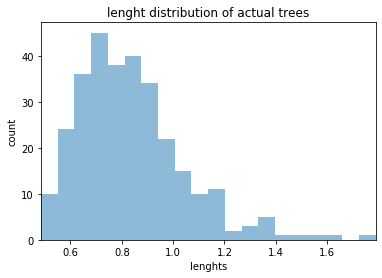

In [59]:
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(len_tree), max(len_tree)])

plt.hist(len_tree, bins=20, alpha=0.5)
plt.title('lenght distribution of actual trees')
plt.xlabel('lenghts')
plt.ylabel('count')

plt.show()

In [ ]:
#CREATE A DATAFRAME TO STORE ALL COMPARISONS OF TREES AND DIFFERENT METHODS OF DISTANCE

col_names = ['Tree_comparison', 'unweighted_distance', 'weighted_distance',
            'euclidean_distance',"Num_First_tree","Num_Second_tree"]
len1 = len(tree_array) - 1
len2 = int((len1*(len1+1))/2)
print(len2)
tree_data = pd.DataFrame(0, index= range(0,len2), columns = col_names)
#print(tree_data)
print("START!!!")

count = 0
k = 0
for i in range(k,304,1):
    for j in range(k+1,304,1):
        #print(str(i+1) + "vs" + str(j+1))
        tree_data.loc[count,'Tree_comparison'] = str(i+1) + "vs" + str(j+1)
        tree_data.loc[count,'Num_First_tree'] = str(i+1)
        tree_data.loc[count,'Num_Second_tree'] = str(j+1)
        tree_data.loc[count,'unweighted_distance'] = unweighted_distance(tree_array[i],tree_array[j])
        tree_data.loc[count,'weighted_distance'] = weighted_distance(tree_array[i],tree_array[j])
        tree_data.loc[count,'euclidean_distance'] = euclidean_distance(tree_array[i],tree_array[j])
        count += 1    
    k += 1;
    
tree_data.to_csv(folder_dir+ 'Sim_Trees_distances_comparisons3.csv',index=False)
print("END!!")
print(tree_data)        

In [ ]:
# CODE TO SPLIT THE COMPARISON VS AND PUT THEM ON SEPARATE ROWS

tree_data_fix = pd.read_csv('/Users/Eric Aragundi/Desktop/research files spring 2022/Trees_distances_comparisons.csv', sep = ',')
# tree_data_fix = tree_data_fix.iloc[0:46056]

for i in range(0,len(tree_data_fix),1):
    s = tree_data_fix.loc[i,"Tree_comparison"].split("vs")
    tree_data_fix.loc[i,"Num_First_tree"] = s[0]
    tree_data_fix.loc[i,"Num_Second_tree"] = s[1]

column_names = ["Tree_comparison", "Num_First_tree", "Num_Second_tree","unweighted_distance","weighted_distance","euclidean_distance"]    
tree_data_fix = tree_data_fix.reindex(columns=column_names)
#s = tree_data_fix.loc[1,"Tree_comparison"].split("vs")
print(tree_data_fix)
tree_data_fix.to_csv('/Users/Eric Aragundi/Desktop/research files spring 2022/Trees_distances_comparisons_2.csv',index=False)
# print(tree_data_fix)

In [ ]:
tree_data_his = pd.read_csv('/Users/Eric Aragundi/Desktop/research files spring 2022/Trees_distances_comparisons.csv', sep = ',')

tree_data_his["unweighted_distance"].hist()
plt.title("Unweighted distance histogram")
plt.xlabel("values")
plt.ylabel('distances')

# tree_data_fix.to_csv('/Users/Eric Aragundi/Desktop/research files spring 2022/Trees_distances_comparisons.csv',index=False)
# print(tree_data_fix)

In [ ]:
tree_data_his["weighted_distance"].hist()
plt.title("Weighted distance histogram")
plt.xlabel("values")
plt.ylabel('distances')

In [ ]:
tree_data_his["euclidean_distance"].hist()
plt.title("Euclidean distance histogram")
plt.xlabel("values")
plt.ylabel('distances')

In [ ]:
# SCRIPT TO FIX THE NEWICK FORMAT OF THE rat_astral_II FILE .TRE EXTENSION TO REMOVE 1 IN FRONT OF SEMICOLONS

file_dir =  "rat_astral_II.tre"
t_dir = folder_dir + file_dir
t_data = open(t_dir)
s = str(t_data.read())
#print(s)
str_split = s.split(":")
print("lenght = "+ str(len(str_split)))

for i in range(0,len(str_split) -1 ,1):
    print("index of string i = " + str(i))
    for j in range(len(str_split[i]),-1,-1):
            if(str_split[i][j-1] == ")"):
                print("index of substring j = " + str(j))
                print(str_split[i][j-1] + "\n")
                break
            else:
                print("index of substring j = " + str(j))
                #print(str_split[i][j-1])
                print("old = " + str_split[i])
                str_split[i] = str_split[i][0:j-1]
                #j = j -1
                print("new = " + str_split[i])
                
                
                #print(str_split[i])
                

Join_sep = ":"                

final_s = Join_sep.join(str_split)
print(final_s)

t_data.close()
#os.remove(data_dir + file_dir)
f= open(folder_dir + file_dir,"w+")
f.write(final_s)
f.close()


# k = 13
# print(str_split[k])
# leng = len(str_split[k]) -1
# s1 = str_split[k][0:leng]
#print(s1)
#print(str_split)

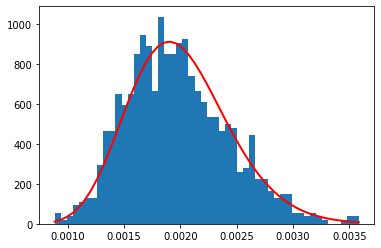

In [16]:
shape, scale = 20, 0.0001  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
s[0]
import matplotlib.pyplot as plt
import scipy.special as sps  
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()